# Importing Modules

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime

import tensorflow as tf
import pickle
import joblib
tf.random.set_seed(4)


In [9]:
reviews = pd.read_csv('encoded_reviews_file.csv')
reviews

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0
...,...,...
5597,camera bad,0
5598,camera stop work month fast charging isn t wor...,0
5599,set clone app whatsapp doneclone whatsapp pr k...,0
5600,phone lag 22 storage,0


# User Defined Functions

In [85]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']

In [10]:
def confusion_metrix_plot(x,y, model):
    ticks = ['Negative', 'Neutral', 'Positive']
    y_predict = np.argmax(model.predict(x), axis = 1)
    conf_table = confusion_matrix(y, y_predict)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_table, annot= True, fmt= 'd',cmap= sns.dark_palette('purple'),
        xticklabels= ticks, yticklabels= ticks, )
    plt.xlabel('Prediction', fontsize= 16)
    plt.ylabel('Correct Values', fontsize= 16)
    print('\n', classification_report(y, y_predict))

In [11]:
def get_prediction(comment, model):
    if type(comment) == list:
        prediction = np.argmax(model.predict(comment), axis = 1)
    else:
        prediction = np.argmax(model.predict([comment]))
    # print(prediction)
    return prediction

In [12]:
log_dir_fun = 'neural_2_logs/'
def log_dir_(model_name):
    LOG_DIR = log_dir_fun + model_name+ '_' +datetime.datetime.now().strftime('%d_%m_%Y-%H%M%S')
    return LOG_DIR

log_dir_('model') 

'neural_2_logs/model_28_01_2022-160136'

# Train-test split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(reviews['lemmatized'], reviews['Sentiment'], test_size= 0.2, random_state = 4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state= 4)

In [14]:
x_train.shape, x_val.shape, x_test.shape

((3360,), (1121,), (1121,))

# Tensorflow Models

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Normalization
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras import layers, Sequential

from tensorflow.keras.preprocessing.text import Tokenizer, one_hot

import os
# import datetime
from tensorflow.keras.models import load_model, save_model

In [16]:
# log_dir = 'neural_2_logs/'
PATH = 'Model_files/'

## Exploring NLP related terms

### Word Vectorize methods

#### One Hot vectorizer

In [17]:
one_hot_vectorizer = [one_hot(sentence, n = 500) for sentence in x_train]

In [18]:
[print(encode, '\n') for  encode in one_hot_vectorizer[:5]]
print(x_train[:5])

[434, 83, 391, 271, 462, 185, 159, 307, 280, 185, 415, 83, 142] 

[177, 18, 186, 273, 239, 184, 449, 391] 

[397, 303, 177, 303, 456, 303, 144, 391, 271, 217] 

[271, 312, 404, 31, 463, 351, 204, 216, 155] 

[436, 32, 262, 178, 497, 371, 56] 

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
Name: lemmatized, dtype: object


In [19]:
len(one_hot_vectorizer)

3360

In [20]:
max(one_hot_vectorizer), min(one_hot_vectorizer)

([498, 436, 149, 249, 471, 463, 90],
 [4,
  11,
  95,
  116,
  343,
  356,
  220,
  230,
  117,
  306,
  449,
  143,
  422,
  449,
  497,
  317,
  228,
  361,
  459,
  204,
  83])

In [21]:
min([min(x) for x in one_hot_vectorizer])

1

In [22]:
max([max(x) for x in one_hot_vectorizer])

499

In [23]:
lst_tokens = list(map(str.split, x_train))

In [24]:
def distinct_word(corpus):
    """
    Determine a list of distinct words for corpus
    params: 
        Corpus (list of list of strings)
    Return:
        Corpus_word (list of unique strings)
        Num_corpus_words
    """
    
    corpus_word = []
    for list_ in lst_tokens:
        for word in list_:
            if word == None:
                pass
            else:
                corpus_word.append(word)

    corpus_word = set(corpus_word)
    corpus_word_list =[]
    for word in corpus_word:
        corpus_word_list.append(word)


    corpus_word_list.sort()
    num_corpus_words = len(corpus_word_list)
    return corpus_word_list, num_corpus_words

In [25]:
unique_words, no_of_words = distinct_word(lst_tokens)

In [26]:
no_of_words

5648

In [27]:
a = 'hello, my name is piyush. This is string created to test one_hot vector method given in tensorflow'
len(a.split())

17

In [28]:
one_hot(a, n = 20)

[6, 16, 4, 13, 5, 18, 13, 19, 13, 8, 6, 15, 8, 10, 17, 7, 13, 19]

### Tokenizer

In [29]:
tokenizer = Tokenizer(num_words= 5600)
tokenizer.fit_on_texts(x_train)

In [30]:
encoded_reviews = tokenizer.texts_to_sequences(x_train)

In [31]:
encoded_reviews[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [32]:
tokenizer.word_index['good']

2

In [33]:
tokenizer.word_index['phone']

1

In [34]:
B = tokenizer.get_config()['word_counts']
import json
dict_count = json.loads(B)

In [35]:
dict_count

{'awesome': 249,
 'product': 404,
 'good': 2095,
 'phone': 2920,
 'budget': 81,
 'thank': 64,
 'amazon': 242,
 'exta': 1,
 'discount': 10,
 'deliver': 32,
 'day': 600,
 'camera': 1892,
 'upto': 68,
 'mark': 77,
 'finger': 106,
 'print': 97,
 'reader': 81,
 'work': 464,
 'game': 132,
 'beast': 25,
 'charge': 781,
 'beastsimply': 1,
 '30000': 31,
 'explode': 25,
 'm': 210,
 'afraid': 9,
 'close': 76,
 'plan': 22,
 'buy': 586,
 'pls': 18,
 'choose': 23,
 'battery': 1387,
 'drain': 328,
 'time': 435,
 'hardly': 20,
 '5': 652,
 'hour': 168,
 'use': 414,
 'amazing': 154,
 'multi': 2,
 'task': 17,
 'ke': 24,
 'slow': 96,
 'ho': 34,
 'raha': 4,
 'hai': 94,
 'seller': 14,
 'ko': 8,
 'iske': 1,
 'bare': 2,
 'sochna': 1,
 'chahiye': 2,
 'system': 33,
 'stability': 11,
 'ka': 12,
 'hota': 17,
 'update': 298,
 'milega': 1,
 'ye': 15,
 'problem': 357,
 'solve': 52,
 'sakta': 2,
 'baki': 2,
 'look': 324,
 'fingerprint': 165,
 'little': 118,
 'bit': 119,
 'bettery': 11,
 'life': 403,
 'well': 366,
 'q

In [36]:
tokenizer_df = pd.DataFrame(dict_count.values(), index= dict_count.keys(), columns=['counts'])
tokenizer_df.head()

,counts
awesome,249
product,404
good,2095
phone,2920
budget,81


In [37]:
tokenizer_df.sort_values(by = 'counts', ascending= False)

,counts
phone,2920
good,2095
camera,1892
battery,1387
2,954
...,...
fi,1
expectedalso,1
jackmemory,1
availablebattery,1


Let's try to find length of sentences and plot their histogram

In [38]:
len_sentences = [len(x) for x in encoded_reviews]

<AxesSubplot:ylabel='Count'>

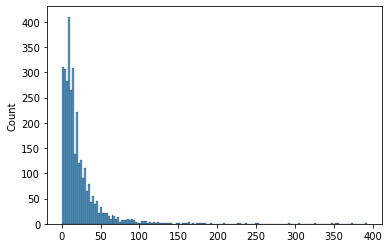

In [39]:
sns.histplot(len_sentences)

In [40]:
len_sentences = np.array(len_sentences)

In [41]:
len_sentences.mean()

22.935714285714287

As we can see that the WortTokenizer assigns the number according to the count of that word, higher the count lower the labels

> As we can see the count of word 'phone' is highest, hence its label will be lowest = 1.

#### Saving Tokenizer method into pickle so we can use it in prediction

In [42]:
# Make director to save this files
PATH_TO_SAVE_VECTORIZER = 'Vectorizer_pickle'
# os.mkdir('Vectorizer_pickle')

In [43]:
file = open('Vectorizer_pickle/Tokenizer.pkl', 'wb')
pickle.dump(tokenizer, file)

So we can export this Tokenizer so now let's re-import it into different variable 

In [44]:
file_ = open(PATH_TO_SAVE_VECTORIZER+'/Tokenizer.pkl', 'rb')
loaded_tokenizer = pickle.load(file_)

In [45]:
loaded_tokenizer.texts_to_sequences(x_train)[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [46]:
x_test

4242                                         nice product
3668    change issue wrap charge doesn t work take app...
1079    feel quality performance unbeatable s iphone s...
1350    phone good fast 90 hz display smooth camera aw...
4161    mobile good camara battery low weight manageme...
                              ...                        
5410    good video stop unfortunately multimedia exper...
3186    1 st oneplus phone battery backup need improve...
2433    m regular user samsung time switch brand like ...
2524      superb camera nice picture quality nice feature
3800    find nord 2 extremely capable device s run hea...
Name: lemmatized, Length: 1121, dtype: object

In [47]:
loaded_tokenizer.texts_to_sequences(x_test)

[[66, 28],
 [215, 11, 783, 10, 116, 6, 23, 93, 1939, 5, 199, 411, 100],
 [37, 7, 24, 9, 313, 2955, 520, 24, 80, 354, 1740, 663, 9, 9, 152, 309, 313],
 [1, 2, 12, 110, 94, 38, 64, 3, 52, 4, 29, 19, 165, 46, 284, 36, 16],
 [15, 2, 585, 4, 106, 453, 672, 232, 198, 585, 2386, 251],
 [19,
  1,
  7,
  752,
  59,
  6,
  20,
  2030,
  606,
  7,
  130,
  308,
  174,
  1021,
  313,
  403,
  18,
  5,
  9,
  4,
  19,
  50,
  19,
  54,
  320,
  1196,
  505,
  1,
  322,
  522,
  16,
  313],
 [4, 40, 12, 26, 48, 37, 17, 500, 26, 2206, 2040, 1455],
 [172, 3, 457, 4208, 164, 64, 1396, 1854, 1374, 531, 2990, 208, 3, 2],
 [2,
  8,
  18,
  5,
  2839,
  850,
  41,
  1,
  3401,
  9,
  109,
  1,
  42,
  98,
  131,
  346,
  18,
  2839,
  2,
  4,
  730,
  813,
  2031,
  4,
  25,
  672,
  59,
  82,
  76,
  45,
  26,
  3,
  14,
  26,
  525,
  26,
  129,
  9,
  2,
  353,
  1,
  177,
  26,
  93,
  358,
  129,
  96],
 [145, 2, 20, 1, 462, 126, 122, 121, 130, 102, 50, 3, 52, 184, 129, 1845, 358],
 [759, 319, 18, 5, 

Hence it is working file and absolute, so we can used this method also for creating united RNN models. we can see it from **words like "phone" and "good"**

### TextVectorizer layer

#### Default settings

In [48]:
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 150

In [49]:
text_vectorizer_encoder = TextVectorization(max_tokens= VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_vectorizer_encoder.adapt(x_train)

In [50]:
vocab_text_vectorizer = text_vectorizer_encoder.get_vocabulary()

In [51]:
len(vocab_text_vectorizer)

5600

In [52]:
text_vectorizer_encoder.get_weights()

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object)]

In [53]:
text_vectorizer_encoder.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 150,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [54]:
vectorized_text = text_vectorizer_encoder(x_train)
vectorized_text

<tf.Tensor: shape=(3360, 150), dtype=int64, numpy=
array([[ 53,  29,   3, ...,   0,   0,   0],
       [  4, 213, 193, ...,   0,   0,   0],
       [106, 486,   4, ...,   0,   0,   0],
       ...,
       [ 20,   2, 236, ...,   0,   0,   0],
       [ 17,   2,   6, ...,   0,   0,   0],
       [ 66,   9,  17, ...,   0,   0,   0]], dtype=int64)>

In [55]:
x_train

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
                              ...                        
1528    wrong seller responsible packaging charger doe...
2120    bad quality connectivity buy replace issue get...
1295    bad phone see don t buy phone phone restart au...
1708    buy phone 2 month hang issue 2 month not use h...
1706    purchase oneplus buy high expectation phone me...
Name: lemmatized, Length: 3360, dtype: object

As you can see the layers is first initialized with x_train and then if we feed other dataset or string, those will be handled according to **adapted dataset**.

Let's try by taking some strings from x_train and also with x_test

> **💀NOTE💀** In following example i am using ***x_train[1]***, it means that i am taking review having label as ***1***. you can cross check it from DataFrame. (i am so lucky that review having label 1 fall in training set 😅😅)

In [56]:
print(f'First string {x_train[1]}')  # We are taking because it contains word "phone"
first_review = x_train[1]

First string like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u 

In [57]:
text_vectorizer_encoder(first_review)

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  18,  392,  243,    7,   78,  653,   61,   18, 2810,   57,  741,
        600,  612,   61,  778,    2,   70,   18,    2,   36,  107,   35,
         84,  811,   81,   17,  718,   17,  313,  149,   19,    6,  154,
         36,  422,  243,    7,  233,   35,   17,    2,  313,  938,  928,
         84,   40,   35,   23,   19,    6, 1422,   32,    7,   56,   21,
        132,  139,   71,    2,   21,  517, 1647,  585,  128, 1158,  468,
        392,  128,   85,  159,    2,  938,   22,   31,   15, 2936,   62,
         85,   23,  466,   99,   58,   36,   71,   40,   35,  173,  825,
         58, 4384,   71,   21,  308,    6,   39,   37,   22,   46,  210,
        153,  280,   38,   13,  188,   96,   31,   45,   12,    2,   75,
        208,   14,   78,  315,    2,  173,    3,  280, 2681,    4, 2256,
        280,  525,    2, 1034,  665, 1486, 4604,   46,  402,  315,   10,
        488, 4465,  280,   38, 1385,   56, 1573,   24,  808,  315,   17,
     

In [58]:
text_vectorizer_encoder('phone')

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)>

As expected the **phone got the number 2 as encoding**, hence this method is based on the same method as Tokenizer. so **1 int may be assigned to ''** 

In [59]:
vectorized_text_array = np.array(vectorized_text)

In [60]:
vectorized_text_array[vectorized_text_array == 0] = 100000

In [61]:
print(x_train[3093])
print(text_vectorizer_encoder(x_train[3093]))

work perfect app porfermance smooth like butter camera good good battery charging fast
tf.Tensor(
[  24  202   26 3670   65   18  647    4    3    3    5  101   13    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(150,), dtype=int64)


In [62]:
np.where(vectorized_text_array.min(axis = 1) == 1)

(array([  35,  199,  374,  382,  592,  622,  645,  776,  831,  867, 1016,
        1067, 1142, 1188, 1197, 1266, 1379, 1460, 1506, 1529, 1536, 1683,
        1823, 2153, 2169, 2362, 2399, 2421, 2451, 2507, 2558, 2750, 2824,
        2932, 3036, 3228, 3261, 3337, 3354], dtype=int64),)

In [63]:
vectorized_text_array[1807]

array([     3,     29,    123,     54,     37,     58, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
      

In [64]:
vectorized_text_array.min(axis = 1)

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [65]:
print(list(x_train)[1807])
text_vectorizer_encoder(list(x_train)[1807])

good product value money great feature


<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  3,  29, 123,  54,  37,  58,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int64)>

As we can see, ***1 label is attached to string "03"***

#### Custom Vectorization methods

We can change Vectorization methods here to CountVectorizer, TF-IDF, One-Hot, **Which is refered as *output_mode* in TextVectorization settings**
There are Following methods, we can also pass n-grams to this methods:

- **int**:  Outputs integer indices, one integer index per split string token. When output_mode == "int", 0 is reserved for masked locations; this reduces the vocab size to **max_tokens - 2 instead of max_tokens - 1**.

 
- **multi_hot**:  Outputs a single int array per batch, of either vocab_size or max_tokens size, containing 1s in all elements where the token mapped to that index exists at least once in the batch item.
 

- **count**:  Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.

 
- **tf_idf**:  Like "multi_hot", but the TF-IDF algorithm is applied to find the value in each token slot. 
For "int" output, any shape of input and output is supported. For all other output modes, currently only rank 1 inputs (and rank 2 outputs after splitting) are supported. 

#### Multi-hot Method

In [66]:
text_vectorizer_encoder_onehot = TextVectorization(max_tokens= VOCAB_SIZE, output_mode= 'multi_hot')
text_vectorizer_encoder_onehot.adapt(x_train)

In [67]:
text_vectorizer_encoder_onehot.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'multi_hot',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [68]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [69]:
print(x_train[1])
print(text_vectorizer_encoder_onehot(x_train[1]))

like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u read em speci

In [70]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

The one_hot encoding is in same order as vocabolary

#### CountVectorizer

In [71]:
text_vectorizer_encoder_count = TextVectorization(max_tokens=VOCAB_SIZE, output_mode='count')
text_vectorizer_encoder_count.adapt(x_train)

In [72]:
text_vectorizer_encoder_count.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [73]:
x_train[3093], x_train[1775], x_train[1273]

('work perfect app porfermance smooth like butter camera good good battery charging fast',
 'bad camera sony cam unbelievable bad fingerprint sensor slow good thing fast charge charge fastly',
 'watch youtube video enhance depth gadget specific knowledge require daily usage phone case minute detail visible human eye phone clearly meet expectation start camera battery screen performance s champ')

In [74]:
text_vectorizer_encoder_count(x_train)

<tf.Tensor: shape=(3360, 5600), dtype=float32, numpy=
array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

It is similar to countvectorizer in scikit-learn

## Tensorflow models

## RNN models

### RNN 1

In [158]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [159]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model = Sequential()
rnn_model.add(text_encoder)
rnn_model.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model.add(SimpleRNN(30))
rnn_model.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model'))

rnn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [160]:
rnn_model.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 42s 253ms/step - loss: 0.9468 - accuracy: 0.5405 - val_loss: 0.7898 - val_accuracy: 0.6824
Epoch 2/10
105/105 [==============================] - 29s 277ms/step - loss: 0.5588 - accuracy: 0.7756 - val_loss: 0.8157 - val_accuracy: 0.6708
Epoch 3/10
105/105 [==============================] - 25s 238ms/step - loss: 0.3563 - accuracy: 0.8607 - val_loss: 0.7489 - val_accuracy: 0.7012
Epoch 4/10
105/105 [==============================] - 21s 198ms/step - loss: 0.1927 - accuracy: 0.9324 - val_loss: 1.0714 - val_accuracy: 0.6405
Epoch 5/10
105/105 [==============================] - 20s 188ms/step - loss: 0.1410 - accuracy: 0.9491 - val_loss: 1.1134 - val_accuracy: 0.6949
Epoch 6/10
105/105 [==============================] - 20s 194ms/step - loss: 0.1678 - accuracy: 0.9426 - val_loss: 1.4401 - val_accuracy: 0.6182
Epoch 7/10
105/105 [==============================] - 20s 193ms/step - loss: 0.1985 - accuracy: 0.9265 - val_loss: 1.2312 - val_ac

In [161]:
get_prediction('Good phone', rnn_model)

1

In [162]:
get_prediction('Best phone', rnn_model)

1

In [163]:
get_prediction('bad phone', rnn_model)

0

In [164]:
D = 'i love this mobile phone. its camera is good, battery backup is good but i found some problem in handling'
get_prediction(D, rnn_model)

0

In [165]:
D = 'i hate this mobile, screen is not working, camera is worst'
get_prediction(D, rnn_model)

0

In [166]:
D = 'worst phone in history'
get_prediction(D, rnn_model)

0

In [167]:
D = 'good phone with good camera'
get_prediction(D, rnn_model)

2

But because of randomness in our model, the results getting changer each time we run the model. To fix that we have to set random seet no.


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99      1210
           2       1.00      0.99      0.99      1213

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



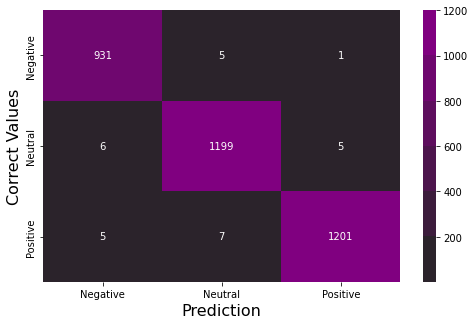

In [168]:
confusion_metrix_plot(x_train, y_train, rnn_model)


               precision    recall  f1-score   support

           0       0.74      0.77      0.75       336
           1       0.55      0.56      0.56       374
           2       0.70      0.66      0.68       411

    accuracy                           0.66      1121
   macro avg       0.66      0.66      0.66      1121
weighted avg       0.66      0.66      0.66      1121



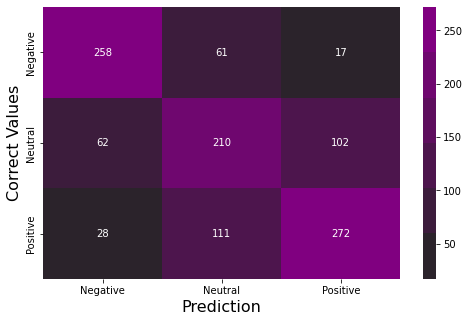

In [169]:
confusion_metrix_plot(x_val, y_val, rnn_model)

Here the mistakes i made in previous models:
- RNN nodes and Sentence Length was not same, because RNN node correspondes to word each word in sentences, so **no. of words in sentence equals to Nodes in RNN**
- Here i have used **vocabolary = VOCAB_SIZE-2**, i don't know its effect so lets try same model with **vocabolary = VOCAB_SIZE-1 and VOCAB_SIZE** 

> **💀NOTE:💀** The Vocabolary size is given as number that is suppose that vacab size is 500 then the numbering will start from 0 to 499 but in this 0 is reserved to actual numbering will be 1-498 so vocab size is reduced by 2. 

### RNN 1 With change in vocab size

In [170]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [171]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_vocab_1 = Sequential()
rnn_model_vocab_1.add(text_encoder)
rnn_model_vocab_1.add(Embedding(input_dim= VOCAB_SIZE-1, output_dim= EMBEDDING, mask_zero= True))
rnn_model_vocab_1.add(SimpleRNN(30))
rnn_model_vocab_1.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_vocal_1'))

rnn_model_vocab_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [172]:
rnn_model_vocab_1.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 43s 351ms/step - loss: 0.9478 - accuracy: 0.5420 - val_loss: 0.7907 - val_accuracy: 0.6833
Epoch 2/10
105/105 [==============================] - 25s 238ms/step - loss: 0.6396 - accuracy: 0.7286 - val_loss: 0.7684 - val_accuracy: 0.6824
Epoch 3/10
105/105 [==============================] - 20s 187ms/step - loss: 0.3418 - accuracy: 0.8664 - val_loss: 0.8399 - val_accuracy: 0.6815
Epoch 4/10
105/105 [==============================] - 20s 189ms/step - loss: 0.1937 - accuracy: 0.9339 - val_loss: 0.9963 - val_accuracy: 0.6922
Epoch 5/10
105/105 [==============================] - 25s 235ms/step - loss: 0.1360 - accuracy: 0.9551 - val_loss: 1.0772 - val_accuracy: 0.7065
Epoch 6/10
105/105 [==============================] - 22s 213ms/step - loss: 0.1314 - accuracy: 0.9551 - val_loss: 1.1518 - val_accuracy: 0.6851
Epoch 7/10
105/105 [==============================] - 19s 179ms/step - loss: 0.0830 - accuracy: 0.9708 - val_loss: 1.3729 - val_ac

In [181]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_vocab_1)
# np.argmax(rnn_model_vocab_1.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [182]:
get_prediction('good phone', rnn_model_vocab_1)

1

In [183]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99      1210
           2       1.00      0.99      0.99      1213

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



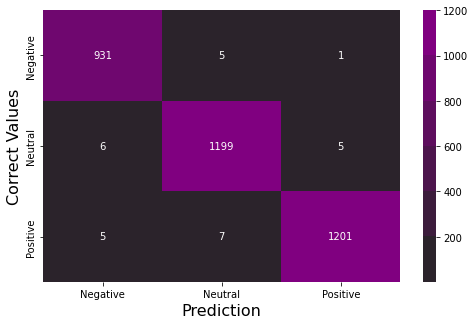

In [184]:
confusion_metrix_plot(x_train, y_train, rnn_model)


               precision    recall  f1-score   support

           0       0.84      0.78      0.81       336
           1       0.60      0.51      0.55       374
           2       0.66      0.80      0.72       411

    accuracy                           0.70      1121
   macro avg       0.70      0.70      0.70      1121
weighted avg       0.70      0.70      0.69      1121



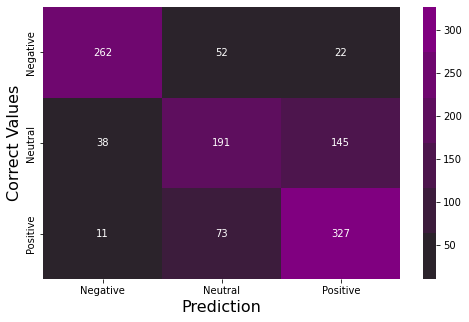

In [185]:
confusion_metrix_plot(x_val, y_val, rnn_model_vocab_1)

### RNN model with large dropout = 0.8

#### RNN model with dropout

In [187]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [188]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout = Sequential()
rnn_model_dropout.add(text_encoder)
rnn_model_dropout.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout.add(SimpleRNN(30, dropout= 0.8))
rnn_model_dropout.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout'))

rnn_model_dropout.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [189]:
rnn_model_dropout.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 39s 327ms/step - loss: 1.0879 - accuracy: 0.4208 - val_loss: 1.0297 - val_accuracy: 0.4344
Epoch 2/10
105/105 [==============================] - 31s 292ms/step - loss: 1.0258 - accuracy: 0.4833 - val_loss: 0.8960 - val_accuracy: 0.6004
Epoch 3/10
105/105 [==============================] - 28s 263ms/step - loss: 0.8907 - accuracy: 0.5759 - val_loss: 0.8692 - val_accuracy: 0.6075
Epoch 4/10
105/105 [==============================] - 28s 263ms/step - loss: 0.8253 - accuracy: 0.6083 - val_loss: 0.9936 - val_accuracy: 0.5112
Epoch 5/10
105/105 [==============================] - 31s 291ms/step - loss: 0.8001 - accuracy: 0.6262 - val_loss: 0.8400 - val_accuracy: 0.6351
Epoch 6/10
105/105 [==============================] - 35s 337ms/step - loss: 0.7781 - accuracy: 0.6482 - val_loss: 0.8145 - val_accuracy: 0.6459
Epoch 7/10
105/105 [==============================] - 28s 268ms/step - loss: 0.7351 - accuracy: 0.6768 - val_loss: 0.8072 - val_ac

In [190]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 1, 0, 2, 0, 2], dtype=int64)

In [191]:
get_prediction('good phone', rnn_model_dropout)

2

In [192]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.71      0.91      0.80       937
           1       0.69      0.36      0.47      1210
           2       0.66      0.84      0.74      1213

    accuracy                           0.68      3360
   macro avg       0.69      0.70      0.67      3360
weighted avg       0.69      0.68      0.66      3360



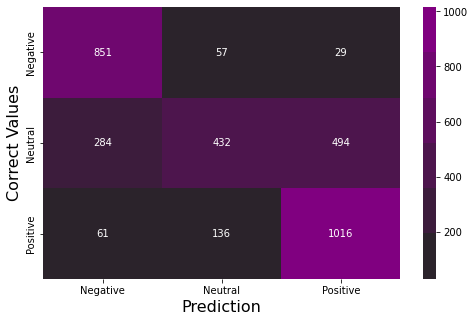

In [193]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout)


               precision    recall  f1-score   support

           0       0.68      0.84      0.75       336
           1       0.54      0.30      0.38       374
           2       0.62      0.76      0.68       411

    accuracy                           0.63      1121
   macro avg       0.61      0.63      0.61      1121
weighted avg       0.61      0.63      0.60      1121



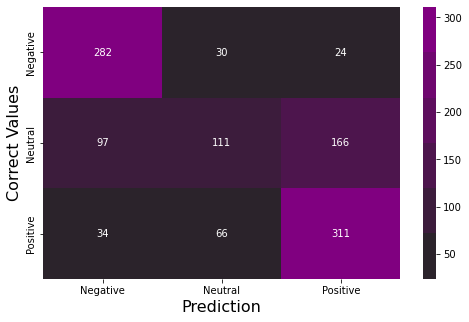

In [194]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout)

So model is working fine so let's train it for large no of epochs

#### RNN model larger epochs with dropout

In [195]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [199]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_large_epochs = Sequential()
rnn_model_dropout_large_epochs.add(text_encoder)
rnn_model_dropout_large_epochs.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_large_epochs.add(SimpleRNN(30, dropout= 0.8))
rnn_model_dropout_large_epochs.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_large_epochs'))

rnn_model_dropout_large_epochs.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [200]:
rnn_model_dropout_large_epochs.fit(x_train, y_train, epochs = 50, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/50
105/105 [==============================] - 39s 328ms/step - loss: 1.0605 - accuracy: 0.4628 - val_loss: 1.1020 - val_accuracy: 0.3488
Epoch 2/50
105/105 [==============================] - 31s 300ms/step - loss: 1.0237 - accuracy: 0.4699 - val_loss: 0.9515 - val_accuracy: 0.4746
Epoch 3/50
105/105 [==============================] - 26s 244ms/step - loss: 0.9367 - accuracy: 0.5432 - val_loss: 0.9525 - val_accuracy: 0.5129
Epoch 4/50
105/105 [==============================] - 28s 267ms/step - loss: 0.8986 - accuracy: 0.5887 - val_loss: 0.8236 - val_accuracy: 0.6093
Epoch 5/50
105/105 [==============================] - 28s 264ms/step - loss: 0.8349 - accuracy: 0.6366 - val_loss: 0.8472 - val_accuracy: 0.6334
Epoch 6/50
105/105 [==============================] - 31s 298ms/step - loss: 0.8449 - accuracy: 0.6226 - val_loss: 0.7224 - val_accuracy: 0.6967
Epoch 7/50
105/105 [==============================] - 27s 254ms/step - loss: 0.7418 - accuracy: 0.6878 - val_loss: 0.9032 - val_ac

In [205]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_large_epochs)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 1, 0, 2, 0, 2], dtype=int64)

In [206]:
get_prediction('good phone', rnn_model_dropout_large_epochs)

2

In [203]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.82      0.85      0.83       937
           1       0.73      0.68      0.70      1210
           2       0.79      0.82      0.80      1213

    accuracy                           0.78      3360
   macro avg       0.78      0.78      0.78      3360
weighted avg       0.78      0.78      0.78      3360



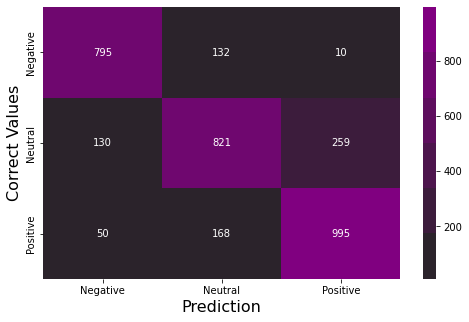

In [207]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_large_epochs)


               precision    recall  f1-score   support

           0       0.66      0.69      0.68       336
           1       0.46      0.47      0.46       374
           2       0.65      0.62      0.63       411

    accuracy                           0.59      1121
   macro avg       0.59      0.59      0.59      1121
weighted avg       0.59      0.59      0.59      1121



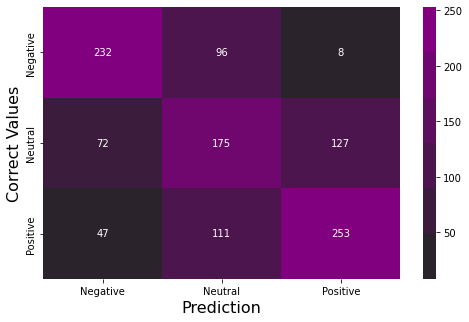

In [208]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_large_epochs)

### RNN model with smaller dropout

#### RNN model with dropout = 0.3

In [209]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.3

In [210]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_small = Sequential()
rnn_model_dropout_small.add(text_encoder)
rnn_model_dropout_small.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_small.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_small.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_small'))

rnn_model_dropout_small.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [211]:
rnn_model_dropout_small.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 41s 345ms/step - loss: 1.0386 - accuracy: 0.4821 - val_loss: 0.9901 - val_accuracy: 0.5058
Epoch 2/10
105/105 [==============================] - 30s 290ms/step - loss: 0.7782 - accuracy: 0.6494 - val_loss: 0.8266 - val_accuracy: 0.6209
Epoch 3/10
105/105 [==============================] - 25s 237ms/step - loss: 0.4986 - accuracy: 0.7917 - val_loss: 0.8947 - val_accuracy: 0.6690
Epoch 4/10
105/105 [==============================] - 25s 238ms/step - loss: 0.3780 - accuracy: 0.8479 - val_loss: 0.8029 - val_accuracy: 0.6869
Epoch 5/10
105/105 [==============================] - 27s 252ms/step - loss: 0.2755 - accuracy: 0.8964 - val_loss: 0.9202 - val_accuracy: 0.6994
Epoch 6/10
105/105 [==============================] - 24s 233ms/step - loss: 0.2407 - accuracy: 0.9095 - val_loss: 0.9596 - val_accuracy: 0.6913
Epoch 7/10
105/105 [==============================] - 30s 284ms/step - loss: 0.1962 - accuracy: 0.9283 - val_loss: 0.9514 - val_ac

In [212]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_small)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [213]:
get_prediction('good phone', rnn_model_dropout_small)

1

In [214]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.98      1.00      0.99       937
           1       0.96      0.97      0.97      1210
           2       0.99      0.96      0.98      1213

    accuracy                           0.98      3360
   macro avg       0.98      0.98      0.98      3360
weighted avg       0.98      0.98      0.98      3360



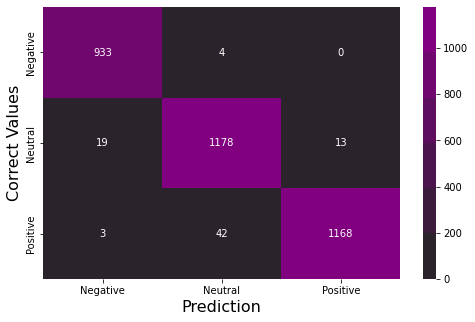

In [215]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_small)


               precision    recall  f1-score   support

           0       0.71      0.83      0.76       336
           1       0.54      0.52      0.53       374
           2       0.75      0.67      0.71       411

    accuracy                           0.67      1121
   macro avg       0.67      0.67      0.67      1121
weighted avg       0.67      0.67      0.67      1121



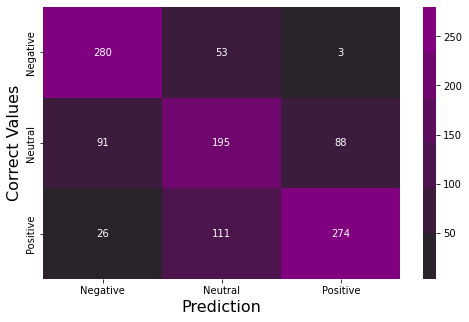

In [216]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_small)

#### RNN Model with dropout = 0.5

In [217]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.5

In [218]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_05 = Sequential()
rnn_model_dropout_05.add(text_encoder)
rnn_model_dropout_05.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_05.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_05.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_05'))

rnn_model_dropout_05.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [219]:
rnn_model_dropout_05.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 36s 296ms/step - loss: 1.0020 - accuracy: 0.4982 - val_loss: 0.8194 - val_accuracy: 0.6236
Epoch 2/10
105/105 [==============================] - 27s 260ms/step - loss: 0.7056 - accuracy: 0.6923 - val_loss: 0.6898 - val_accuracy: 0.6922
Epoch 3/10
105/105 [==============================] - 22s 211ms/step - loss: 0.5239 - accuracy: 0.7872 - val_loss: 0.8232 - val_accuracy: 0.6905
Epoch 4/10
105/105 [==============================] - 23s 224ms/step - loss: 0.5011 - accuracy: 0.7961 - val_loss: 0.7749 - val_accuracy: 0.6530
Epoch 5/10
105/105 [==============================] - 26s 251ms/step - loss: 0.5554 - accuracy: 0.7720 - val_loss: 0.7890 - val_accuracy: 0.6557
Epoch 6/10
105/105 [==============================] - 24s 224ms/step - loss: 0.4246 - accuracy: 0.8304 - val_loss: 0.7644 - val_accuracy: 0.7083
Epoch 7/10
105/105 [==============================] - 27s 254ms/step - loss: 0.3617 - accuracy: 0.8586 - val_loss: 0.7665 - val_ac

In [220]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_05)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 2, 0, 2], dtype=int64)

In [221]:
get_prediction('good phone', rnn_model_dropout_05)

1

In [222]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.96      0.99      0.98       937
           1       0.99      0.89      0.93      1210
           2       0.92      0.99      0.95      1213

    accuracy                           0.95      3360
   macro avg       0.96      0.96      0.95      3360
weighted avg       0.95      0.95      0.95      3360



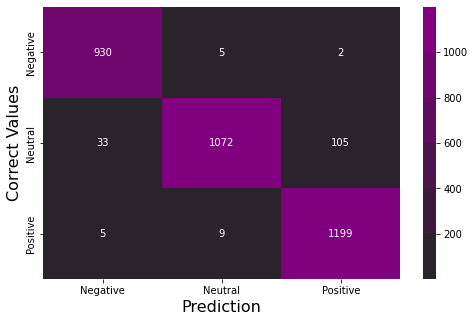

In [223]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_05)


               precision    recall  f1-score   support

           0       0.71      0.85      0.77       336
           1       0.66      0.46      0.54       374
           2       0.73      0.81      0.77       411

    accuracy                           0.71      1121
   macro avg       0.70      0.71      0.70      1121
weighted avg       0.70      0.71      0.69      1121



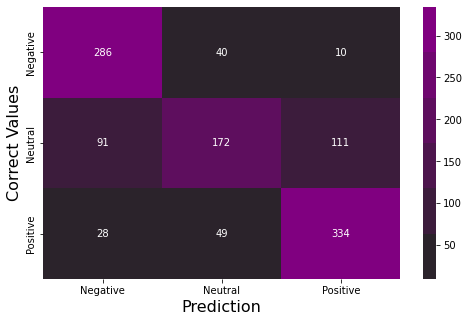

In [224]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_05)

Now model is bit improved, we can see training and validation accuracies are bit closed but let's try another model with 0.6 dropout

#### RNN model with dropout = 0.7

In [225]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.7

In [226]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_07 = Sequential()
rnn_model_dropout_07.add(text_encoder)
rnn_model_dropout_07.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_07.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_07.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_07'))

rnn_model_dropout_07.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [227]:
rnn_model_dropout_07.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 46s 392ms/step - loss: 1.0484 - accuracy: 0.4676 - val_loss: 0.9726 - val_accuracy: 0.5442
Epoch 2/10
105/105 [==============================] - 29s 279ms/step - loss: 0.8630 - accuracy: 0.6238 - val_loss: 0.7012 - val_accuracy: 0.6994
Epoch 3/10
105/105 [==============================] - 23s 223ms/step - loss: 0.8031 - accuracy: 0.6348 - val_loss: 0.7867 - val_accuracy: 0.6396
Epoch 4/10
105/105 [==============================] - 29s 280ms/step - loss: 0.6866 - accuracy: 0.7036 - val_loss: 0.7248 - val_accuracy: 0.7047
Epoch 5/10
105/105 [==============================] - 26s 247ms/step - loss: 0.6382 - accuracy: 0.7345 - val_loss: 0.7746 - val_accuracy: 0.6780
Epoch 6/10
105/105 [==============================] - 28s 268ms/step - loss: 0.6448 - accuracy: 0.7211 - val_loss: 0.7115 - val_accuracy: 0.7003
Epoch 7/10
105/105 [==============================] - 27s 256ms/step - loss: 0.5822 - accuracy: 0.7589 - val_loss: 0.7056 - val_ac

In [228]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_07)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [229]:
get_prediction('good phone', rnn_model_dropout_07)

1

In [230]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.93      0.90      0.92       937
           1       0.91      0.58      0.71      1210
           2       0.71      0.98      0.82      1213

    accuracy                           0.81      3360
   macro avg       0.85      0.82      0.82      3360
weighted avg       0.84      0.81      0.81      3360



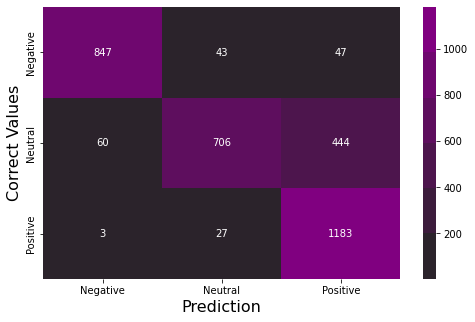

In [231]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_07)


               precision    recall  f1-score   support

           0       0.79      0.76      0.78       336
           1       0.69      0.39      0.49       374
           2       0.64      0.92      0.76       411

    accuracy                           0.69      1121
   macro avg       0.71      0.69      0.68      1121
weighted avg       0.70      0.69      0.67      1121



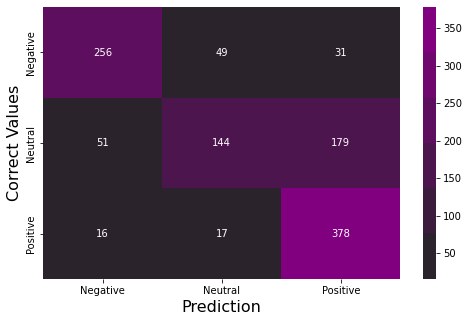

In [232]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_07)

#### NOTE
we tried RNN model with small epochs with dropout 0.3,0.5,0.7,0.8, i found out that may be we should go with bit complex model and try to train model with dropout 0.7 bit longer

#### RNN model with dropout = 0.7

In [233]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.7

In [234]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_07_longer = Sequential()
rnn_model_dropout_07_longer.add(text_encoder)
rnn_model_dropout_07_longer.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_07_longer.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_07_longer.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_07_longer'))

rnn_model_dropout_07_longer.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [235]:
rnn_model_dropout_07_longer.fit(x_train, y_train, epochs = 30, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/30
105/105 [==============================] - 43s 346ms/step - loss: 1.0659 - accuracy: 0.4387 - val_loss: 0.9712 - val_accuracy: 0.5575
Epoch 2/30
105/105 [==============================] - 29s 275ms/step - loss: 0.8589 - accuracy: 0.6137 - val_loss: 0.7574 - val_accuracy: 0.6699
Epoch 3/30
105/105 [==============================] - 24s 232ms/step - loss: 0.6878 - accuracy: 0.7122 - val_loss: 0.7409 - val_accuracy: 0.6860
Epoch 4/30
105/105 [==============================] - 23s 215ms/step - loss: 0.6777 - accuracy: 0.7188 - val_loss: 0.8002 - val_accuracy: 0.6494
Epoch 5/30
105/105 [==============================] - 27s 257ms/step - loss: 0.6142 - accuracy: 0.7467 - val_loss: 0.7396 - val_accuracy: 0.6985
Epoch 6/30
105/105 [==============================] - 22s 212ms/step - loss: 0.6104 - accuracy: 0.7524 - val_loss: 0.8177 - val_accuracy: 0.6824
Epoch 7/30
105/105 [==============================] - 23s 221ms/step - loss: 0.6134 - accuracy: 0.7467 - val_loss: 0.7139 - val_ac

In [237]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_07_longer)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 2, 0, 2, 0, 2], dtype=int64)

In [246]:
get_prediction('good phone', rnn_model_dropout_07_longer)

2

In [239]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.71      0.91      0.80       937
           1       0.75      0.43      0.55      1210
           2       0.71      0.86      0.78      1213

    accuracy                           0.72      3360
   macro avg       0.72      0.73      0.71      3360
weighted avg       0.72      0.72      0.70      3360



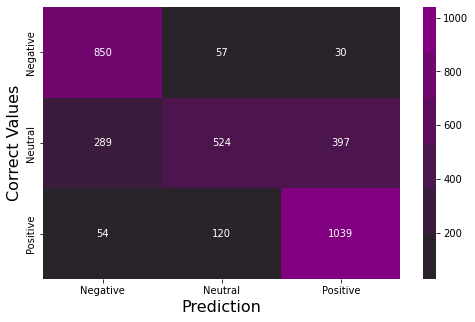

In [247]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_07_longer)


               precision    recall  f1-score   support

           0       0.64      0.82      0.72       336
           1       0.53      0.32      0.40       374
           2       0.66      0.75      0.70       411

    accuracy                           0.63      1121
   macro avg       0.61      0.63      0.61      1121
weighted avg       0.61      0.63      0.61      1121



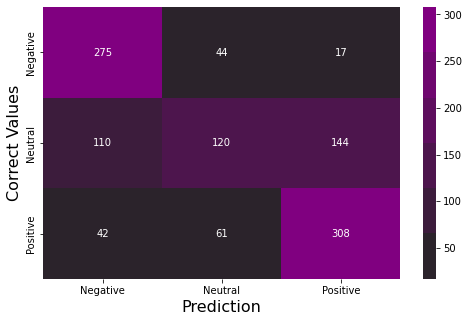

In [248]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_07_longer)

This model is performing worst, so let's try with 0.5 dropout. 
if that even is not working then i will increase complexity of model

#### RNN model with dropout = 0.5

In [268]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.5

In [269]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_05_longer = Sequential()
rnn_model_dropout_05_longer.add(text_encoder)
rnn_model_dropout_05_longer.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING))
rnn_model_dropout_05_longer.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_05_longer.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_05_longer'))

rnn_model_dropout_05_longer.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [270]:
rnn_model_dropout_05_longer.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 34s 283ms/step - loss: 1.0794 - accuracy: 0.4176 - val_loss: 1.0736 - val_accuracy: 0.4193
Epoch 2/10
105/105 [==============================] - 24s 228ms/step - loss: 1.0350 - accuracy: 0.4643 - val_loss: 1.0369 - val_accuracy: 0.4755
Epoch 3/10
105/105 [==============================] - 25s 236ms/step - loss: 0.9745 - accuracy: 0.5039 - val_loss: 1.0521 - val_accuracy: 0.4871
Epoch 4/10
105/105 [==============================] - 21s 201ms/step - loss: 0.9253 - accuracy: 0.5301 - val_loss: 1.0607 - val_accuracy: 0.4888
Epoch 5/10
105/105 [==============================] - 22s 212ms/step - loss: 0.9045 - accuracy: 0.5426 - val_loss: 1.0236 - val_accuracy: 0.4951
Epoch 6/10
105/105 [==============================] - 21s 204ms/step - loss: 0.8706 - accuracy: 0.5664 - val_loss: 1.0609 - val_accuracy: 0.4692
Epoch 7/10
105/105 [==============================] - 22s 213ms/step - loss: 0.9369 - accuracy: 0.5396 - val_loss: 1.0379 - val_ac

In [271]:
rnn_model_dropout_05_longer.save(PATH+'rnn_model_dropout_05_longer.tf')

INFO:tensorflow:Assets written to: Model_files/rnn_model_dropout_05_longer.tf\assets


In [272]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_05_longer)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 0, 1, 1, 0, 1], dtype=int64)

In [273]:
get_prediction('good phone', rnn_model_dropout_05_longer)

1

In [274]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.65      0.50      0.57       937
           1       0.46      0.85      0.60      1210
           2       0.94      0.31      0.46      1213

    accuracy                           0.56      3360
   macro avg       0.68      0.55      0.54      3360
weighted avg       0.69      0.56      0.54      3360



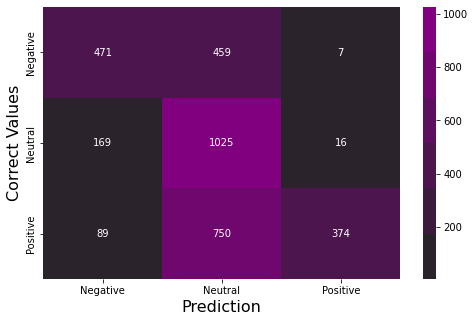

In [275]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_05_longer)


               precision    recall  f1-score   support

           0       0.57      0.44      0.50       336
           1       0.41      0.83      0.55       374
           2       0.70      0.18      0.29       411

    accuracy                           0.48      1121
   macro avg       0.56      0.48      0.45      1121
weighted avg       0.57      0.48      0.44      1121



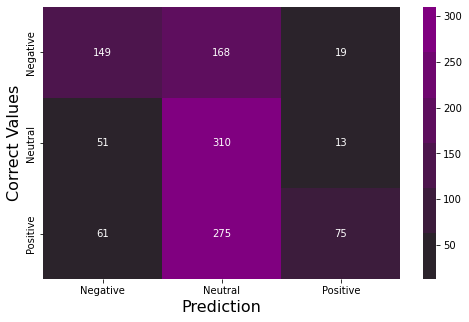

In [276]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_05_longer)

Remember to set mark_zero to False, because if it equal to True model won't get saved

In [277]:
rnn_model_dropout_05_longer_reload = tf.keras.models.load_model('Model_files/rnn_model_dropout_05_longer.tf')

In [278]:
rnn_model_dropout_05_longer_reload.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10


G:\python_virtual_env\myenv\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/boolean_mask_1/GatherV2:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/boolean_mask/GatherV2:0", shape=(None, 15), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/Shape:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


105/105 [==============================] - 77s 709ms/step - loss: 1.0871 - accuracy: 0.4226 - val_loss: 0.9566 - val_accuracy: 0.5219
Epoch 2/10
 74/105 [====================>.........] - ETA: 19s - loss: 0.9662 - accuracy: 0.5270

#### NOTE
why RNN?? Why?? As we can see the model is not training much better, let's try to run simplest model for higher epochs or upto overfitting

### Overfit model

In [257]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [258]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_for_overfit = Sequential()
rnn_model_for_overfit.add(text_encoder)
rnn_model_for_overfit.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_for_overfit.add(SimpleRNN(30))
rnn_model_for_overfit.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_for_overfit'))

rnn_model_for_overfit.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [259]:
rnn_model_for_overfit.fit(x_train, y_train, epochs = 50, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/50
105/105 [==============================] - 42s 359ms/step - loss: 0.9468 - accuracy: 0.5402 - val_loss: 0.7870 - val_accuracy: 0.6815
Epoch 2/50
105/105 [==============================] - 36s 340ms/step - loss: 0.5331 - accuracy: 0.7815 - val_loss: 0.7253 - val_accuracy: 0.6878
Epoch 3/50
105/105 [==============================] - 30s 282ms/step - loss: 0.3113 - accuracy: 0.8759 - val_loss: 0.8295 - val_accuracy: 0.6994
Epoch 4/50
105/105 [==============================] - 26s 250ms/step - loss: 0.1578 - accuracy: 0.9458 - val_loss: 0.9950 - val_accuracy: 0.6771
Epoch 5/50
105/105 [==============================] - 27s 257ms/step - loss: 0.1183 - accuracy: 0.9598 - val_loss: 1.1543 - val_accuracy: 0.6789
Epoch 6/50
105/105 [==============================] - 27s 254ms/step - loss: 0.1304 - accuracy: 0.9565 - val_loss: 1.2437 - val_accuracy: 0.6521
Epoch 7/50
105/105 [==============================] - 27s 260ms/step - loss: 0.1773 - accuracy: 0.9342 - val_loss: 1.4547 - val_ac

In [260]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_for_overfit)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 2, 0, 0, 0, 2], dtype=int64)

In [261]:
get_prediction('good phone', rnn_model_for_overfit)

1

In [262]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.94      0.94      0.94       937
           1       0.90      0.87      0.89      1210
           2       0.91      0.93      0.92      1213

    accuracy                           0.91      3360
   macro avg       0.92      0.92      0.92      3360
weighted avg       0.91      0.91      0.91      3360



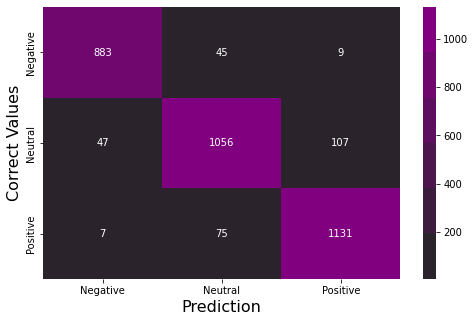

In [263]:
confusion_metrix_plot(x_train, y_train, rnn_model_for_overfit)


               precision    recall  f1-score   support

           0       0.68      0.76      0.72       336
           1       0.51      0.43      0.47       374
           2       0.64      0.67      0.65       411

    accuracy                           0.62      1121
   macro avg       0.61      0.62      0.61      1121
weighted avg       0.61      0.62      0.61      1121



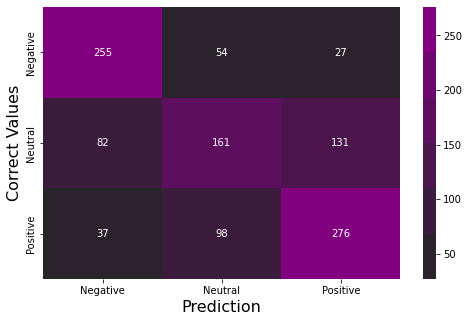

In [264]:
confusion_metrix_plot(x_val, y_val, rnn_model_for_overfit)

### Note
No success with longer epochs, so now lets try complex model

### Making complex model

In [78]:
log_dir_fun

'neural_2_logs/'

In [82]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 50
EMBEDDING = 30
VOCAB_SIZE = 5600

In [83]:
tf.random.set_seed(4)
encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
encoder.adapt(x_train)
rnn_model_complex = Sequential()
rnn_model_complex.add(encoder)
rnn_model_complex.add(Embedding(VOCAB_SIZE-2, EMBEDDING))
rnn_model_complex.add(SimpleRNN(SENTENCE_LENGTH))
rnn_model_complex.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir_('rnn_complex'))

rnn_model_complex.compile(optimizer= tf.keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics= ['accuracy'])

In [84]:
rnn_model_complex.fit(x_train, y_train, epochs = 10, validation_data = [x_val, y_val]
, callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 35s 300ms/step - loss: 1.0453 - accuracy: 0.4762 - val_loss: 0.9710 - val_accuracy: 0.5442
Epoch 2/10
105/105 [==============================] - 25s 234ms/step - loss: 0.7436 - accuracy: 0.6938 - val_loss: 0.7958 - val_accuracy: 0.6592
Epoch 3/10
105/105 [==============================] - 20s 190ms/step - loss: 0.4447 - accuracy: 0.8369 - val_loss: 0.7755 - val_accuracy: 0.6646
Epoch 4/10
105/105 [==============================] - 21s 200ms/step - loss: 0.3013 - accuracy: 0.8940 - val_loss: 0.7544 - val_accuracy: 0.7199
Epoch 5/10
105/105 [==============================] - 20s 188ms/step - loss: 0.1855 - accuracy: 0.9399 - val_loss: 0.7271 - val_accuracy: 0.7360
Epoch 6/10
105/105 [==============================] - 22s 210ms/step - loss: 0.1306 - accuracy: 0.9592 - val_loss: 0.9489 - val_accuracy: 0.6922
Epoch 7/10
105/105 [==============================] - 22s 206ms/step - loss: 0.0998 - accuracy: 0.9640 - val_loss: 0.8365 - val_ac

In [86]:
rnn_model_complex.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 50, 30)            167940    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


In [91]:
tf.keras.utils.plot_model(rnn_model_complex)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
